In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
from alpha_vantage.timeseries import TimeSeries
from pyCBT.providers.oanda import account, historical

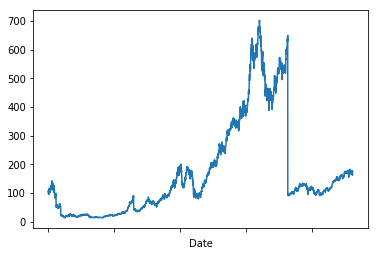

In [3]:
indices_avantage = {
    "DJA": "^DJA",
    "DXY": "DX-Y.NYB",
    "NASDAQ": "^IXIC",
    "VIX": "^VIX",
    "VXN": "^VXN",
    "VXO": "^VXO"
}
stocks_avantage = {
    "**AAPL": "AAPL",
    "*MSFT": "MSFT",
    "AMZN": "AMZN",
    "*GOOG": "GOOG",
    "FB": "FB",
    "*JPM": "JPM",
    "***BRK.B": "BRK-B",
    "*JNJ": "JNJ",
    "**XOM": "XOM"
}
ts = TimeSeries(key="RL0YBD0NPUE3QYQ6", output_format="pandas")
candles, _ = ts.get_daily_adjusted("AAPL", outputsize="full")
# candles.index = pd.to_datetime(candles.index)
candles.index.name = "Date"
col_mapping = {
    "1. open": "Open",
    "2. high": "High",
    "3. low": "Low",
    "4. close": "Close",
    "5. volume": "Volume"
}
candles.rename(col_mapping, axis="columns", inplace=True)
candles[candles==0] = np.nan
candles.dropna(how="all", axis="index", inplace=True)
candles.Open.plot()

In [4]:
client = account.Client()
ins = account.Instruments(client)

types = unique([ins.table[kw]["type"] for kw in ins.table])
print types

for kw in ins.table:
    if ins.table[kw].get("type")=="CFD": print kw

[u'CFD' u'CURRENCY' u'METAL']
UK10YB_GBP
SUGAR_USD
SOYBN_USD
USB05Y_USD
US30_USD
CORN_USD
WTICO_USD
DE30_EUR
JP225_USD
USB02Y_USD
FR40_EUR
US2000_USD
NATGAS_USD
WHEAT_USD
AU200_AUD
SPX500_USD
EU50_EUR
USB30Y_USD
SG30_SGD
USB10Y_USD
IN50_USD
CN50_USD
BCO_USD
TWIX_USD
NAS100_USD
NL25_EUR
XCU_USD
HK33_HKD
UK100_GBP
DE10YB_EUR


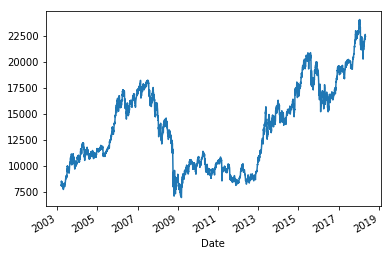

In [5]:
indices_oanda = {
    "NYA": "US2000_USD",
    "DJI": "US30_USD",
    "FTSE": "UK100_GBP",
    "FCHI": "FR40_EUR",
    "DAX": "DE30_EUR",
    "SSE": "CN50_USD",
    "HSI": "HK33_HKD",
    "Nikkei": "JP225_USD"
}
currencies_oanda = {
    "USDCAD": "USD_CAD",
    "EURUSD": "EUR_USD",
    "GBPUSD": "GBP_USD",
    "USDCNY": "USD_CNY",
    "USDJPY": "USD_JPY"
}
ts = historical.Candles(client, instrument="JP225_USD", resolution="D", from_date="2000-01-01", datetime_fmt="%Y-%m-%d")
df = ts.as_dataframe(index_name="Date")

df.Close.plot()